In [30]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import datetime
import re

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, KFold , cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

import statsmodels.api as sm
import statsmodels.formula.api as smf


plt.style.use('seaborn')
sns.set_palette("husl")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
df = pd.read_csv('data/clean_listing2.csv')

In [4]:
df.head()

Unnamed: 0  host_since host_response_rate host_is_superhost  accommodates  \
0           0  2008-08-29               100%                 t             1   
1           1  2011-12-26               100%                 f             3   
2           2  2013-10-17               100%                 t             3   
3           3  2014-03-20               100%                 f             6   
4           4  2014-03-20               100%                 f             2   

   bathrooms  bedrooms  beds  \
0        1.0       1.0   1.0   
1        NaN       1.0   1.0   
2        1.0       1.0   1.0   
3        1.5       3.0   3.0   
4        1.5       1.0   1.0   

                                           amenities    price  ...   \
0  {TV,Wifi,Kitchen,Breakfast,"Free street parkin...   $50.00  ...    
1                             {TV,"Smoking allowed"}   $48.00  ...    
2  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   $59.00  ...    
3  {Internet,Wifi,"Air conditioning",Kitchen,"Pet...  $165.00  ...    
4  {Internet,Wifi,"Air conditioning",Kitchen,"Pet...   $94.00  ...    

  review_scores_rating review_scores_accuracy  review_scores_cleanliness  \
0                100.0                   10.0                       10.0   
1                 95.0                   10.0                        9.0   
2                 97.0                   10.0                       10.0   
3                 98.0                   10.0                       10.0   
4                 99.0                   10.0                       10.0   

  review_scores_checkin  review_scores_communication  review_scores_location  \
0                  10.0                         10.0                    10.0   
1                  10.0                         10.0                     8.0   
2                  10.0                         10.0                     9.0   
3                  10.0                         10.0                    10.0   
4                  10.0                         10.0                    10.0   

   review_scores_value is_business_travel_ready          cancellation_policy  \
0                 10.0                        f  strict_14_with_grace_period   
1                 10.0                        f                     flexible   
2                 10.0                        f                     moderate   
3                 10.0                        f  strict_14_with_grace_period   
4                 10.0                        f                     moderate   

    zvi  
0  1400  
1  1400  
2  1400  
3  1400  
4  1400  

[5 rows x 29 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7715 entries, 0 to 7714
Data columns (total 29 columns):
Unnamed: 0                     7715 non-null int64
host_since                     7714 non-null object
host_response_rate             6807 non-null object
host_is_superhost              7714 non-null object
accommodates                   7715 non-null int64
bathrooms                      7712 non-null float64
bedrooms                       7713 non-null float64
beds                           7712 non-null float64
amenities                      7715 non-null object
price                          7715 non-null object
security_deposit               5120 non-null object
cleaning_fee                   6380 non-null object
guests_included                7715 non-null int64
extra_people                   7715 non-null object
availability_60                7715 non-null int64
availability_90                7715 non-null int64
number_of_reviews              7715 non-null int64
first_review

In [6]:
df.rename(index = str, columns ={'zvi' :'rent_index'}, inplace = True)

df.rename(str.lower , axis ='columns', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7715 entries, 0 to 7714
Data columns (total 29 columns):
unnamed: 0                     7715 non-null int64
host_since                     7714 non-null object
host_response_rate             6807 non-null object
host_is_superhost              7714 non-null object
accommodates                   7715 non-null int64
bathrooms                      7712 non-null float64
bedrooms                       7713 non-null float64
beds                           7712 non-null float64
amenities                      7715 non-null object
price                          7715 non-null object
security_deposit               5120 non-null object
cleaning_fee                   6380 non-null object
guests_included                7715 non-null int64
extra_people                   7715 non-null object
availability_60                7715 non-null int64
availability_90                7715 non-null int64
number_of_reviews              7715 non-null int64
first_review     

In [8]:
def clean_price(dataframe, list_of_columns):
    '''
    Iterate through a list_of_columns in a dataframe (df)
    and convert price objects into int64.
    '''
    
    for column in list_of_columns:
        dataframe[column] = dataframe[column].str[1:]
        dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce').fillna(0)
        dataframe[column] = dataframe[column].astype('int64')
    return dataframe

df = clean_price(df, ['price', 'security_deposit', 'cleaning_fee', 'extra_people'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7715 entries, 0 to 7714
Data columns (total 29 columns):
unnamed: 0                     7715 non-null int64
host_since                     7714 non-null object
host_response_rate             6807 non-null object
host_is_superhost              7714 non-null object
accommodates                   7715 non-null int64
bathrooms                      7712 non-null float64
bedrooms                       7713 non-null float64
beds                           7712 non-null float64
amenities                      7715 non-null object
price                          7715 non-null int64
security_deposit               7715 non-null int64
cleaning_fee                   7715 non-null int64
guests_included                7715 non-null int64
extra_people                   7715 non-null int64
availability_60                7715 non-null int64
availability_90                7715 non-null int64
number_of_reviews              7715 non-null int64
first_review         

In [10]:
def make_datetime_object(dataframe, list_of_columns):
    '''
    Iterate through a list_of_columns in a dataframe (df)
    and convert date objects into datetime.
    '''
    
    for column in list_of_columns:
        dataframe[column] = pd.to_datetime(dataframe[column], format = '%m-%d-%Y', errors ='ignore')
        dataframe[column] = dataframe[column].astype('datetime64')
    return dataframe

now = datetime.datetime.now().date()
print(now)

df['now'] = now

df = make_datetime_object(df, ['host_since', 'first_review', 'last_review', 'now'])

df['review_period'] = (df['last_review'] - df['first_review']).astype('timedelta64[D]')
df['number_of_days_as_host'] = (df['now'] - df['host_since']).astype('timedelta64[D]')


2018-10-11


In [11]:
def clean_amenities(dataframe):
    
    dataframe['amenities'] = [value[1:-1] for value in dataframe['amenities']]
    dataframe['number_of_amenities'] = [len(value.split(',')) for value in dataframe['amenities']]
    
    return dataframe  

df = clean_amenities(df)

In [12]:
df_new = df[['bathrooms', 'bedrooms', 'beds',
       'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people','number_of_reviews', 'rent_index', 'number_of_days_as_host',
       'number_of_amenities', 'price']]

In [13]:
#df_new.head()
df_new.columns

Index(['bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'number_of_reviews', 'rent_index',
       'number_of_days_as_host', 'number_of_amenities', 'price'],
      dtype='object')

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7715 entries, 0 to 7714
Data columns (total 12 columns):
bathrooms                 7712 non-null float64
bedrooms                  7713 non-null float64
beds                      7712 non-null float64
security_deposit          7715 non-null int64
cleaning_fee              7715 non-null int64
guests_included           7715 non-null int64
extra_people              7715 non-null int64
number_of_reviews         7715 non-null int64
rent_index                7715 non-null int64
number_of_days_as_host    7714 non-null float64
number_of_amenities       7715 non-null int64
price                     7715 non-null int64
dtypes: float64(4), int64(8)
memory usage: 783.6+ KB


In [15]:
df_new=df_new.dropna()

In [16]:
df_new.corr()

bathrooms  bedrooms      beds  security_deposit  \
bathrooms                1.000000  0.535397  0.524393          0.113491   
bedrooms                 0.535397  1.000000  0.758372          0.227177   
beds                     0.524393  0.758372  1.000000          0.203133   
security_deposit         0.113491  0.227177  0.203133          1.000000   
cleaning_fee             0.332575  0.530433  0.470053          0.380593   
guests_included          0.366028  0.587133  0.536181          0.260730   
extra_people             0.095683  0.148319  0.112339          0.132420   
number_of_reviews       -0.052072 -0.014742  0.001561         -0.008938   
rent_index              -0.026069  0.078493  0.060789          0.097734   
number_of_days_as_host   0.014004  0.024350 -0.017384          0.073405   
number_of_amenities      0.121736  0.179072  0.183792          0.190534   
price                    0.318267  0.469454  0.404890          0.208298   

                        cleaning_fee  guests_included  extra_people  \
bathrooms                   0.332575         0.366028      0.095683   
bedrooms                    0.530433         0.587133      0.148319   
beds                        0.470053         0.536181      0.112339   
security_deposit            0.380593         0.260730      0.132420   
cleaning_fee                1.000000         0.480995      0.252544   
guests_included             0.480995         1.000000      0.332547   
extra_people                0.252544         0.332547      1.000000   
number_of_reviews          -0.080091         0.054050      0.033848   
rent_index                  0.164267         0.062688      0.031963   
number_of_days_as_host      0.079522         0.014230      0.059181   
number_of_amenities         0.248115         0.234618      0.104568   
price                       0.490678         0.355066      0.133475   

                        number_of_reviews  rent_index  number_of_days_as_host  \
bathrooms                       -0.052072   -0.026069                0.014004   
bedrooms                        -0.014742    0.078493                0.024350   
beds                             0.001561    0.060789               -0.017384   
security_deposit                -0.008938    0.097734                0.073405   
cleaning_fee                    -0.080091    0.164267                0.079522   
guests_included                  0.054050    0.062688                0.014230   
extra_people                     0.033848    0.031963                0.059181   
number_of_reviews                1.000000    0.044974                0.228729   
rent_index                       0.044974    1.000000                0.128818   
number_of_days_as_host           0.228729    0.128818                1.000000   
number_of_amenities              0.204417    0.059436                0.078005   
price                           -0.123662    0.175287               -0.000751   

                        number_of_amenities     price  
bathrooms                          0.121736  0.318267  
bedrooms                           0.179072  0.469454  
beds                               0.183792  0.404890  
security_deposit                   0.190534  0.208298  
cleaning_fee                       0.248115  0.490678  
guests_included                    0.234618  0.355066  
extra_people                       0.104568  0.133475  
number_of_reviews                  0.204417 -0.123662  
rent_index                         0.059436  0.175287  
number_of_days_as_host             0.078005 -0.000751  
number_of_amenities                1.000000  0.160030  
price                              0.160030  1.000000

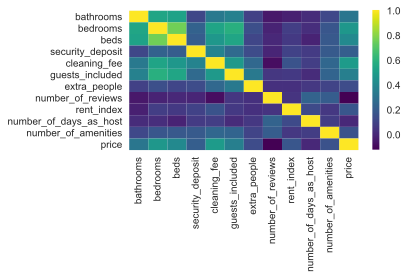

In [71]:
sns.heatmap(df_new.corr(), cmap="viridis");
#plt.figure(figsize=(10,10))
plt.tight_layout()
plt.savefig('correlation_plot.png', dpi=300)

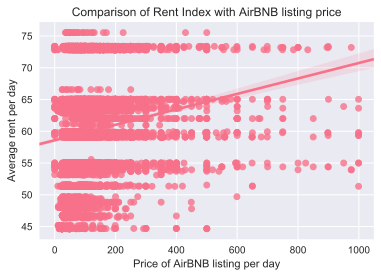

In [53]:
y = [x/30 for x in df_new.rent_index]
sns.regplot(x='price', y= y , data = df_new);
plt.title('Comparison of Rent Index with AirBNB listing price');
plt.ylabel('Average rent per day');
plt.xlabel('Price of AirBNB listing per day');

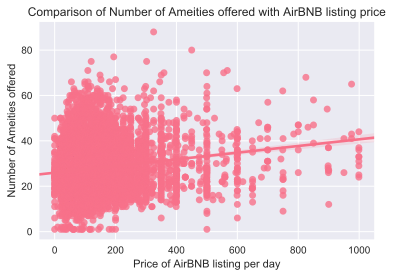

In [55]:
#y = [x/30 for x in df_new.rent_index]
sns.regplot(x='price', y= 'number_of_amenities' , data = df_new);
plt.title('Comparison of Number of Ameities offered with AirBNB listing price');
plt.ylabel('Number of Ameities offered');
plt.xlabel('Price of AirBNB listing per day');

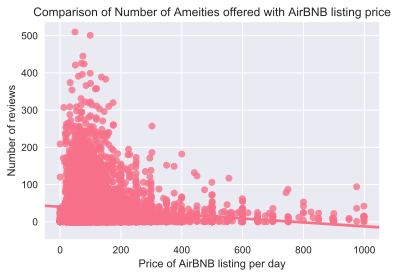

In [56]:
sns.regplot(x='price', y= 'number_of_reviews' , data = df_new);
plt.title('Comparison of Number of Ameities offered with AirBNB listing price');
plt.ylabel('Number of reviews');
plt.xlabel('Price of AirBNB listing per day');

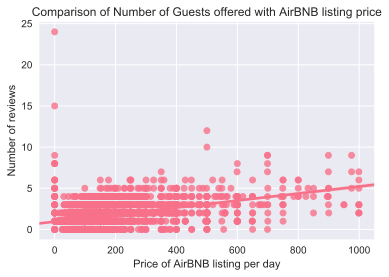

In [73]:
sns.regplot(x='price', y= 'bedrooms' , data = df_new);
plt.title('Comparison of Number of Guests offered with AirBNB listing price');
plt.ylabel('Number of reviews');
plt.xlabel('Price of AirBNB listing per day');

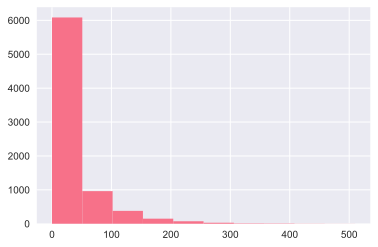

In [57]:
plt.hist(df_new.number_of_reviews);

In [ ]:
#sns.pairplot(df_new);

In [18]:
est=LinearRegression()
from sklearn import feature_selection as f_select

sig_columns=[]
pvals=[] # will be the list of all significant columns' p-values

for feature in df_new.columns:
    #get pval on feature by feature basis
    pval=f_select.f_regression(df_new[[feature]],df_new.price) # univariate regression for feature selection ; gets f-value and p-value scores
    print(pval)
    if pval[1][0]<.02: 
        sig_columns.append(feature)
        pvals.append(pval[1][0])
        
df_new_trans=df_new[sig_columns]

cross_val_score(est,df_new_trans,df_new.price,cv=5,scoring='r2').mean() 

(array([868.55169872]), array([5.54322294e-181]))
(array([2178.39591443]), array([0.]))
(array([1510.99441735]), array([5.50016569e-302]))
(array([349.51350151]), array([2.59139055e-76]))
(array([2443.68868347]), array([0.]))
(array([1111.65903844]), array([8.19779327e-228]))
(array([139.77652228]), array([5.62292872e-32]))
(array([119.67340658]), array([1.19038897e-27]))
(array([244.27580037]), array([3.10857164e-54]))
(array([0.00435018]), array([0.94741466]))
(array([202.53567984]), array([2.18854824e-45]))
(array([-1.73523694e+19]), array([1.]))


0.29797781171618204

In [19]:
print(sig_columns)

['bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'number_of_reviews', 'rent_index', 'number_of_amenities']


### Models

In [20]:
X = df_new[['bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'number_of_reviews', 'rent_index', 'number_of_amenities']]
y = df_new['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 97)

In [21]:
ab_lr = LinearRegression()

In [22]:
ab_lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
ab_lr.score(X_train,y_train)

0.3381007393844925

In [24]:
ab_lr.coef_

array([ 1.03965321e+01,  2.10210070e+01,  3.82052487e+00,  7.75491304e-03,
        7.08468802e-01,  2.69672602e+00, -4.42544052e-03, -2.38438971e-01,
        5.50683833e-02,  3.53897530e-01])

In [25]:
s = ab_lr.score(X_test, y_test)
r = np.sqrt(mean_squared_error(y_test, ab_lr.predict(X_test)))
print('R^2:', s, 'RMSE:' , r)

R^2: 0.3060651920034765 RMSE: 98.18507477800054


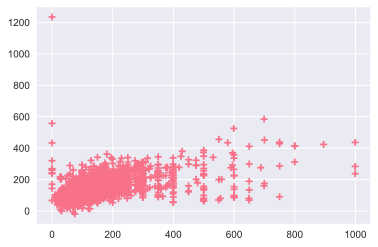

In [39]:
plt.scatter(y_test,ab_lr.predict(X_test), marker='+'); #shows nonlinear pattern

In [31]:
lm1 = smf.ols('price ~ bathrooms + bedrooms + beds + security_deposit + cleaning_fee + guests_included + extra_people + number_of_reviews + rent_index + number_of_amenities', data = df_new)

# Fit your model to your training set
fit_lm1 = lm1.fit()

# Print summary statistics of the model's performance
fit_lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     377.8
Date:                Thu, 11 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:12:58   Log-Likelihood:                -46106.
No. Observations:                7708   AIC:                         9.223e+04
Df Residuals:                    7697   BIC:                         9.231e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -60.0297      8.871     -6.767      0.000     -77.420     -42.639
bathrooms              10.4972      1.767      5.941      0.000       7.033      13.961
bedrooms               23.4828      1.751     13.408      0.000      20.050      26.916
beds                    2.9133      1.033      2.820      0.005       0.888       4.938
security_deposit        0.0062      0.007      0.858      0.391      -0.008       0.020
cleaning_fee            0.6490      0.029     22.388      0.000       0.592       0.706
guests_included         2.2418      0.818      2.742      0.006       0.639       3.845
extra_people            0.0176      0.046      0.379      0.705      -0.073       0.109
number_of_reviews      -0.2601      0.023    -11.417      0.000      -0.305      -0.215
rent_index              0.0536      0.005     11.716      0.000       0.045       0.063
number_of_amenities     0.4681      0.109      4.292      0.000       0.254       0.682
==============================================================================
Omnibus:                     4102.048   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109080.959
Skew:                           2.015   Prob(JB):                         0.00
Kurtosis:                      20.983   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
lm2 = smf.gls('price ~ bathrooms + bedrooms + cleaning_fee + guests_included + rent_index + number_of_amenities', data = df_new)

# Fit your model to your training set
fit_lm2 = lm2.fit()

# Print summary statistics of the model's performance
fit_lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.317
Model:                            GLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     596.3
Date:                Thu, 11 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:25:50   Log-Likelihood:                -46175.
No. Observations:                7708   AIC:                         9.236e+04
Df Residuals:                    7701   BIC:                         9.241e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -58.8219      8.932     -6.585      0.000     -76.331     -41.313
bathrooms              12.4750      1.742      7.162      0.000       9.061      15.890
bedrooms               26.0221      1.482     17.557      0.000      23.117      28.927
cleaning_fee            0.7085      0.028     25.691      0.000       0.654       0.763
guests_included         1.9577      0.782      2.502      0.012       0.424       3.492
rent_index              0.0510      0.005     11.077      0.000       0.042       0.060
number_of_amenities     0.2133      0.107      1.999      0.046       0.004       0.423
==============================================================================
Omnibus:                     4189.940   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103681.455
Skew:                           2.101   Prob(JB):                         0.00
Kurtosis:                      20.469   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### RidgeCV

In [26]:
model_r1 = RidgeCV(alphas=(0.1, 1, 10), fit_intercept=True, scoring='neg_mean_squared_error', cv= 10)
model_r1.fit(X_train, y_train)

RidgeCV(alphas=(0.1, 1, 10), cv=10, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring='neg_mean_squared_error',
    store_cv_values=False)

In [27]:
s = model_r1.score(X_train, y_train)
r = np.sqrt(mean_squared_error(y_train, model_r1.predict(X_train)))
print('R^2:', s, 'RMSE:' , r)

R^2: 0.33810049131739695 RMSE: 94.89803412192052


In [28]:
s = model_r1.score(X_test, y_test)
r = np.sqrt(mean_squared_error(y_test, model_r1.predict(X_test)))
print('R^2:', s, 'RMSE:' , r)

R^2: 0.3060235958733364 RMSE: 98.18801745928705
